<a href="https://colab.research.google.com/github/Shubh4545/Customer-conversion-prediction-/blob/main/Customer_conversion_prediction_2_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.Import and dataset load**

In [84]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,f1_score,precision_score
from sklearn.metrics import roc_auc_score

In [85]:
import numpy as np
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [86]:
customer_data = pd.read_csv('/content/Customer Conversion Prediction - Customer Conversion Prediction.csv')
customer_data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


**2.Data Cleaning**

In [87]:
customer_data.isna().sum().sum()   #no na values present

0

In [88]:
customer_data.duplicated().sum()  #there are 6 duplicate rows we need to drop

6

In [89]:
customer_data.drop_duplicates()        #duplicated values dropped
customer_data.info()                   #to check datatypes of columns and there are no null values 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  int64 
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   call_type       45211 non-null  object
 5   day             45211 non-null  int64 
 6   mon             45211 non-null  object
 7   dur             45211 non-null  int64 
 8   num_calls       45211 non-null  int64 
 9   prev_outcome    45211 non-null  object
 10  y               45211 non-null  object
dtypes: int64(4), object(7)
memory usage: 3.8+ MB


In [90]:
customer_data.describe()      # statistically cheking any outlires present or not

,age,day,dur,num_calls
count,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,15.806419,258.163080,2.763841
std,10.618762,8.322476,257.527812,3.098021
min,18.000000,1.000000,0.000000,1.000000
25%,33.000000,8.000000,103.000000,1.000000
50%,39.000000,16.000000,180.000000,2.000000
75%,48.000000,21.000000,319.000000,3.000000
max,95.000000,31.000000,4918.000000,63.000000


**3.EDA**

In [91]:
#y data changed to categarical value
customer_data.replace({'y' : { 'yes':1, 'no':0}},inplace=True)

In [92]:
conversion_rate_by_job = customer_data.groupby(
    by='job'
)['y'].sum() / customer_data.groupby(
    by='job'
)['y'].count() * 100.0

In [93]:
conversion_rate_by_job   #we can see students tends to et convert easily than other jobs

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: y, dtype: float64

Text(0, 0.5, 'Job')

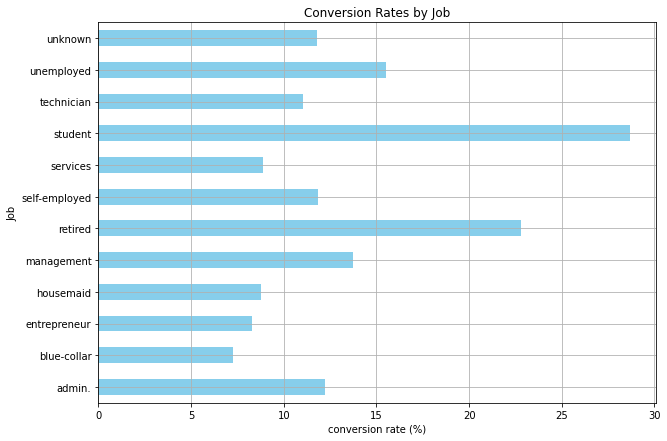

In [94]:
ax = conversion_rate_by_job.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Job'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('Job')


In [95]:
conversion_rate_by_marital = customer_data.groupby(
    by='marital'
)['y'].sum() / customer_data.groupby(
    by='marital'
)['y'].count() * 100.0

In [96]:
conversion_rate_by_marital

marital
divorced    11.945458
married     10.123466
single      14.949179
Name: y, dtype: float64

Text(0, 0.5, 'mariatal status')

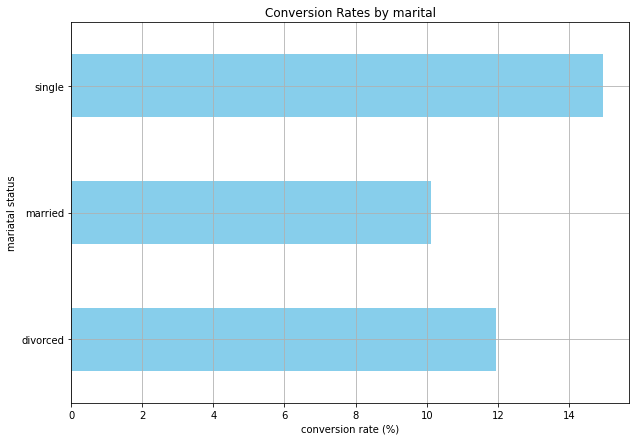

In [97]:
ax = conversion_rate_by_marital.plot(
    kind='barh',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by marital'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('mariatal status')

In [98]:
conversion_rate_by_education_qual = customer_data.groupby(
    by='education_qual'
)['y'].sum() / customer_data.groupby(
    by='education_qual'
)['y'].count() * 100.0

In [99]:
conversion_rate_by_education_qual

education_qual
primary       8.626478
secondary    10.559435
tertiary     15.006390
unknown      13.570275
Name: y, dtype: float64

Text(0, 0.5, 'education_qual status')

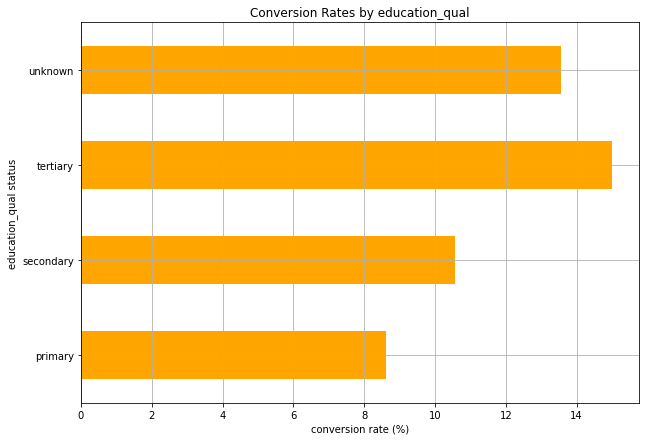

In [100]:
ax = conversion_rate_by_education_qual.plot(
    kind='barh',
    color='orange',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by education_qual'
)

ax.set_xlabel('conversion rate (%)')
ax.set_ylabel('education_qual status')

**Encoding**

In [101]:
customer_data['mon'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [102]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

customer_data['mon'] = customer_data['mon'].apply(
    lambda x: months.index(x)+1
)

In [103]:
customer_data

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,5,261,1,unknown,0
1,44,technician,single,secondary,unknown,5,5,151,1,unknown,0
2,33,entrepreneur,married,secondary,unknown,5,5,76,1,unknown,0
3,47,blue-collar,married,unknown,unknown,5,5,92,1,unknown,0
4,33,unknown,single,unknown,unknown,5,5,198,1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,11,977,3,unknown,1
45207,71,retired,divorced,primary,cellular,17,11,456,2,unknown,1
45208,72,retired,married,secondary,cellular,17,11,1127,5,success,1
45209,57,blue-collar,married,secondary,telephone,17,11,508,4,unknown,0


In [104]:
customer_data.groupby('mon').count()['y']    #month wise data 

mon
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: y, dtype: int64

In [105]:
customer_data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [106]:
def encoding_data(df,col):
  for i in col:
     df_dummies = pd.get_dummies(df[i], prefix=i)
     df = pd.concat([df, df_dummies], axis=1)
     df.drop([i],inplace=True,axis=1)
  return df

In [107]:
columns=['call_type','education_qual','prev_outcome','job','marital']
customer_data=encoding_data(customer_data,columns)

In [108]:
customer_data

,age,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown,education_qual_primary,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,5,5,261,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,44,5,5,151,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,33,5,5,76,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,47,5,5,92,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,33,5,5,198,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,17,11,977,3,1,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
45207,71,17,11,456,2,1,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
45208,72,17,11,1127,5,1,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
45209,57,17,11,508,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [109]:
customer_data.corr()    #we can see most imp feature is dur 
                        #features according to imp are----->  dur,call_type,age,mon etc




                        

,age,day,mon,dur,num_calls,y,call_type_cellular,call_type_telephone,call_type_unknown,education_qual_primary,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
age,1.000000,-0.009120,0.092903,-0.004648,0.004760,0.025155,-0.068375,0.170349,-0.020132,0.196182,...,0.447378,-0.008093,-0.065780,-0.197302,-0.068632,0.000412,0.050200,0.164674,0.286257,-0.427817
day,-0.009120,1.000000,0.101989,-0.030206,0.162490,-0.028348,0.020186,0.023652,-0.034103,-0.019551,...,-0.010123,0.005062,-0.006531,-0.015894,0.032517,-0.006382,-0.011199,-0.000433,0.007102,-0.007412
mon,0.092903,0.101989,1.000000,-0.011866,0.054868,0.018717,0.153677,0.037628,-0.182490,-0.026489,...,0.024953,0.026396,-0.040318,-0.018733,0.037859,-0.040271,0.009391,0.000281,0.062925,-0.068586
dur,-0.004648,-0.030206,-0.011866,1.000000,-0.084570,0.394521,0.025543,-0.023201,-0.014379,-0.003660,...,0.026032,0.007383,0.001427,-0.006504,-0.009176,0.020322,-0.006390,0.006100,-0.022683,0.020328
num_calls,0.004760,0.162490,0.054868,-0.084570,1.000000,-0.073172,-0.032271,0.053895,0.004853,0.009616,...,-0.030913,0.005479,-0.004671,-0.021813,0.020739,-0.018448,0.014091,-0.015484,0.031371,-0.023120
y,0.025155,-0.028348,0.018717,0.394521,-0.073172,1.000000,0.135873,0.014042,-0.150935,-0.040393,...,0.079245,0.000855,-0.027864,0.076897,-0.008970,0.020390,0.000267,0.002772,-0.060260,0.063526
call_type_cellular,-0.068375,0.020186,0.153677,0.025543,-0.032271,0.135873,1.000000,-0.355403,-0.862398,-0.112307,...,-0.020484,0.015440,-0.030893,0.029049,0.056982,0.013007,-0.032331,-0.006786,-0.043477,0.052061
call_type_telephone,0.170349,0.023652,0.037628,-0.023201,0.053895,0.014042,-0.355403,1.000000,-0.166683,0.070841,...,0.107299,-0.001716,-0.012178,0.024493,-0.040357,0.008759,0.031162,-0.017993,0.048970,-0.040468
call_type_unknown,-0.020132,-0.034103,-0.182490,-0.014379,0.004853,-0.150935,-0.862398,-0.166683,1.000000,0.080104,...,-0.036504,-0.015358,0.039184,-0.043908,-0.038252,-0.018464,0.017228,0.016904,0.019342,-0.033001
education_qual_primary,0.196182,-0.019551,-0.026489,-0.003660,0.009616,-0.040393,-0.112307,0.070841,0.080104,1.000000,...,0.127818,-0.036715,-0.060749,-0.042472,-0.163859,0.021957,0.005705,-0.007157,0.141412,-0.148613


# **Data preprocessing**

---



In [110]:
X= customer_data.drop(['y'],axis=1)
y= customer_data['y']

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [112]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**1.Logistic Regression**

In [113]:
lr_model = LogisticRegression(max_iter=20)
lr_model.fit(X_train, y_train)
predicted=lr_model.predict(X_test)
conf = confusion_matrix(y_test, predicted)
print ("Confusion Matrix : \n", conf)
print()
print()
print ("The accuracy of Logistic Regression is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1]))

Confusion Matrix : 
 [[12851   324]
 [ 1161   584]]


The accuracy of Logistic Regression is :  90.04691689008042 %
The aurroc_auc_score of Logistic Regression is :  0.8792351146947365


**2.Gaussian Naive Bayes**

In [114]:
gb_model = GaussianNB()
gb_model.fit(X_train, y_train)
  
predicted = gb_model.predict(X_test)
  
print("The accuracy of Gaussian Naive Bayes model is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of 2.Gaussian Naive Bayes is : ", roc_auc_score(y_test, gb_model.predict_proba(X_test)[:, 1]))

The accuracy of Gaussian Naive Bayes model is :  83.55898123324397 %
The aurroc_auc_score of 2.Gaussian Naive Bayes is :  0.7946227714858937


**3.SVM**

In [115]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
  
predicted = svm_model.predict(X_test)
print("The accuracy of SVM is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of SVM is : ", roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1]))

The accuracy of SVM is :  89.85924932975871 %
The aurroc_auc_score of SVM is :  0.8442586952148453


4.Random Forest

In [116]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)  
rf_model.fit(X_train, y_train)  
predicted = rf_model.predict(X_test)
print("The accuracy of Random Forest is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of  random forest is : ", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))

The accuracy of Random Forest is :  90.04691689008042 %
The aurroc_auc_score of  random forest is :  0.9143901741489645


**Feature importance**

<AxesSubplot:>

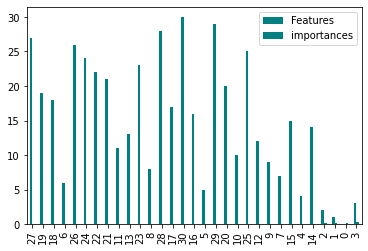

In [117]:
importances = rf_model.feature_importances_
df = pd.DataFrame({"Features":pd.DataFrame(X_test).columns,"importances":importances})
df.set_index("importances")

df = df.sort_values('importances')
df.plot.bar(color='teal')

**5.K Nearest Neighbours**

In [118]:
knn_model = KNeighborsClassifier(n_neighbors = 1)  
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_test)
  

print(confusion_matrix(y_test, predicted))
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of Logistic Regression is : ", roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1]))

[[12378   797]
 [ 1056   689]]
The accuracy of KNN is :  87.5804289544236 %
The aurroc_auc_score of Logistic Regression is :  0.6671745241215074


**Optimizing the KNN**

In [119]:
error_rate = []
  
for i in range(1, 40):
      
    knn_model = KNeighborsClassifier(n_neighbors = i)
    knn_model.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
  



In [120]:
df = pd.DataFrame(error_rate)
print('min error rate is : ',df.min())
print(df.idxmin())

min error rate is :  0    0.103552
dtype: float64
0    10
dtype: int64


In [121]:
knn_model = KNeighborsClassifier(n_neighbors = 10)
  
knn_model.fit(X_train, y_train)
predicted = knn_model.predict(X_test)
  
print('Confusion Matrix :')
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predicted))

print()
print()
print("The accuracy of KNN is : ", accuracy_score(y_test, predicted.round())*100, "%")
print ("The aurroc_auc_score of knn is : ", roc_auc_score(y_test, knn_model.predict_proba(X_test)[:, 1]))

Confusion Matrix :
[[12928   247]
 [ 1310   435]]


The accuracy of KNN is :  89.56434316353888 %
The aurroc_auc_score of knn is :  0.8303906091135964


**6.XGBoost**

In [122]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False)
xgb_model.fit(X_train, y_train)
   
predicted = xgb_model.predict(X_test)
   
cm = confusion_matrix(y_test, predicted)
print()
print ("The accuracy of X Gradient Boosting is : ", accuracy_score(y_test, predicted)*100, "%")
print ("The aurroc_auc_score of Gradient Boosting is : ", roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1]))

/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")



The accuracy of X Gradient Boosting is :  90.59651474530831 %
The aurroc_auc_score of Gradient Boosting is :  0.9293103961984092


# Conclusion


1.   **1.Most of the models are performing really well.**
2.   **2.XGBoost is performing the best for the given dataset.**
